# t-тест

In [33]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns

df = pd.read_csv('Data/Running.csv')
df.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


- Athlete - является ли студент спортсменом
- MileMinDur - за какое время студент пробегает 1 милю

$H_0$: Нет разницы ссредних времен, которое пробегают спортсмены и нет

## Параметры теста:
* Двусторонний тест
* $\alpha = 0.05$
* Критическое значение t-критерия: $\pm1.9667$
* Критическая область: $( -\infty, -1.9667 ] \cup [ 1.9667, \infty )$

## Вучную

In [34]:
df['MileSecDur'] = df['MileMinDur'].astype('datetime64[ns]').apply(lambda x: x.minute * 60 + x.second)

In [35]:
athletes = df.loc[df['Athlete'] == 1, 'MileSecDur']
non_athletes = df.loc[df['Athlete'] == 0, 'MileSecDur']

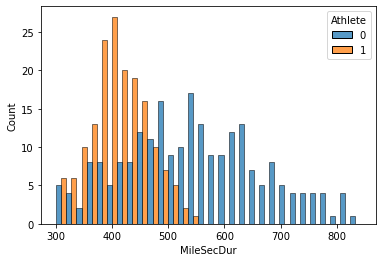

In [39]:
sns.histplot(data=df, x="MileSecDur", hue="Athlete", multiple="dodge", bins=30);

In [43]:
print('    athletes var', athletes.var())
print('non_athletes var', non_athletes.var())

    athletes var 2444.858853596203
non_athletes var 14802.27848574238


### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

In [63]:
n_1, n_2 = len(non_athletes), len(athletes)
mean_1, mean_2 = non_athletes.mean(), athletes.mean()
var_1, var_2 = non_athletes.var(), athletes.var()

a = pd.DataFrame(data=[[n_1, mean_1, var_1], 
                       [n_2, mean_2, var_2]], 
             index=[1, 2], columns=['n', 'mean', 'var'])
a

,n,mean,var
1,226,546.101770,14802.278486
2,166,411.313253,2444.858854


$
V_1 = \frac{s^2_1}{n_1}
$
$
V_2 = \frac{s^2_2}{n_2}
$

In [74]:
v_1 = var_1 / n_1
v_2 = var_2 / n_2

df_welch = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
print(df_welch)
print(int(df_welch))  # округляем вниз до целого

315.7925948972666
315


In [78]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) > t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')


t_critical = 1.9667

$
\begin{align}
s_{(M_1 - M_2)} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
\end{align}
$

In [82]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
s_m1_m2

8.956833862596019

$
\begin{align}
t = \frac{(M_1 - M_2) - (\mu_1 - \mu_2)}{s_{(M_1 - M_2)}}
\end{align}
$

In [81]:
t = (mean_1 - mean_2) / s_m1_m2
t

15.048678915697742

In [80]:
hypothesis_check(t, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


## scipy.stats

In [83]:
import scipy.stats

### `ttest_ind_from_stats`

In [85]:
# Передаем значения статистик
scipy.stats.ttest_ind_from_stats(
    mean1=mean_1, std1=np.sqrt(var_1), nobs1=n_1,
    mean2=mean_2, std2=np.sqrt(var_2), nobs2=n_2,
    equal_var=False  # False - если дисперсия двую выборок не равна, применяется поправка Уэлча
)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.824578890260176e-39)

### `ttest_ind`

In [86]:
# Передаем сами выборки
scipy.stats.ttest_ind(a=non_athletes, 
                      b=athletes, 
                      equal_var=False  # False - если дисперсия двую выборок не равна, применяется поправка Уэлча
                     )

Ttest_indResult(statistic=15.048678915697742, pvalue=5.82457889026026e-39)

### Доверительный интервал (confidence interval - CI)

$СI = (М_1 - М_2) \pm ts_{(M_1 - M_2)}$

In [90]:
CI_bottom = (mean_1 - mean_2) - t_critical*s_m1_m2
CI_top = (mean_1 - mean_2) + t_critical*s_m1_m2
CI_bottom, CI_top

(117.17311174188869, 152.40392205702386)